In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 1. Data

size information : 100 X 100, color channel: 3


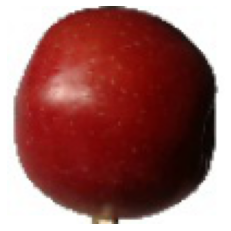

In [9]:
# 1. Data overview
import os
import matplotlib.image as mpimg

dir_path = "./datas/fruits 360{}"

ls = os.listdir(dir_path.format("/Apple"))
image = mpimg.imread(dir_path.format("/Apple/") + ls[0])

img_height, img_width, color_channel = image.shape
print("size information : {} X {}, color channel: {}".format(img_width, img_height, color_channel))

plt.imshow(image)
plt.axis("off")
plt.show()

In [10]:
# 2. Datas Import (Use tensorflow dataset)
# {dir_path}/[class_names]/.jpg, .bmp, .png ,,,
import tensorflow as tf
from tensorflow import keras

batch_size = 32

print("train dataset import----")
train_ds = keras.preprocessing.image_dataset_from_directory(
  dir_path.format(""),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100,100),
  batch_size=batch_size)

print("\ntest dataset import----")
val_ds = keras.preprocessing.image_dataset_from_directory(
  dir_path.format(""),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(100,100),
  batch_size=batch_size)

train dataset import----
Found 1470 files belonging to 3 classes.
Using 1176 files for training.

test dataset import----
Found 1470 files belonging to 3 classes.
Using 294 files for validation.


In [11]:
# 2. train dataset analysis
X_train, y_train = next(iter(train_ds))

batch_size, height, width, color_channel = X_train.shape
print("batch_size : {}".format(batch_size))
print("size information : {} X {}, color channel : {} (RGB Channel)".format(width, height, color_channel))

batch_size : 32
size information : 100 X 100, color channel : 3 (RGB Channel)


RGB Channel Shape : (100, 100, 3)
Grayscale Channel Shape : (100, 100)


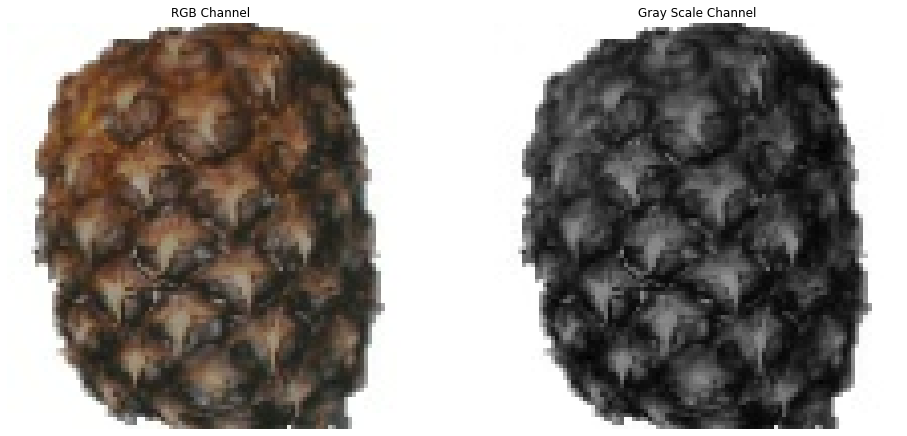

In [12]:
# 3. visualization
plt.figure(figsize=(16, 8))

# RGB Channel
image = np.array(X_train[0])
print("RGB Channel Shape : {}".format(image.shape))
rgb_ax = plt.subplot(1, 2, 1)
plt.title("RGB Channel")
plt.axis("off")
rgb_ax.imshow(image.astype("uint8"))

# Grayscale Channel
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
imgGray = 0.299 * R + 0.587 * G + 0.114 * B
print("Grayscale Channel Shape : {}".format(imgGray.shape))
gray_ax = plt.subplot(1, 2, 2)
plt.title("Gray Scale Channel")
plt.axis("off")
gray_ax.imshow(imgGray, cmap="gray")

plt.show()

classification label title : Apple Banana Pineapple


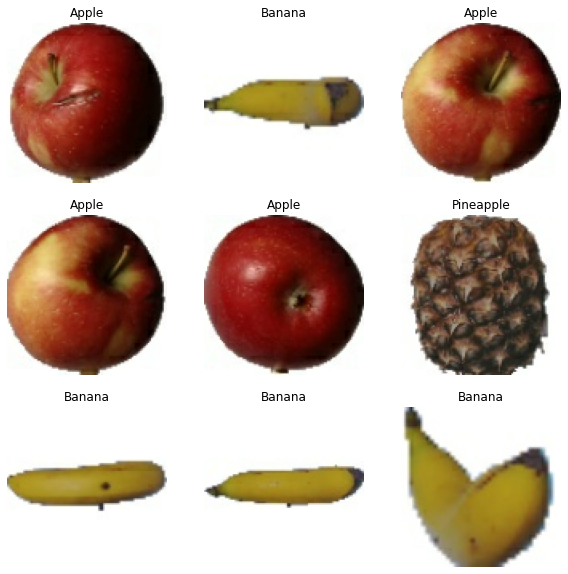

In [13]:
# 4. All datas visualization
class_names = train_ds.class_names
print("classification label title : {}".format(" ".join(class_names)))

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# 2. Model Setting

In [14]:
# 1. Options
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
# 2. model setting
num_classes = len(class_names)

model = keras.Sequential([
  keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3), name="normalization"),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
], name="cnn_image_classification")

model.summary()

Model: "cnn_image_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Rescaling)   (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25

In [16]:
# 3. compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# 4. model fitting
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
37/37 [==============================] - 5s 102ms/step - loss: 0.3225 - accuracy: 0.8886 - val_loss: 8.9371e-05 - val_accuracy: 1.0000
Epoch 2/10
37/37 [==============================] - 3s 90ms/step - loss: 3.8930e-05 - accuracy: 1.0000 - val_loss: 4.6268e-06 - val_accuracy: 1.0000
Epoch 3/10
37/37 [==============================] - 3s 91ms/step - loss: 4.7037e-06 - accuracy: 1.0000 - val_loss: 3.5527e-06 - val_accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 3s 90ms/step - loss: 3.6300e-06 - accuracy: 1.0000 - val_loss: 3.2478e-06 - val_accuracy: 1.0000
Epoch 5/10
37/37 [==============================] - 3s 87ms/step - loss: 3.2626e-06 - accuracy: 1.0000 - val_loss: 2.8910e-06 - val_accuracy: 1.0000
Epoch 6/10
37/37 [==============================] - 3s 91ms/step - loss: 2.9511e-06 - accuracy: 1.0000 - val_loss: 2.6218e-06 - val_accuracy: 1.0000
Epoch 7/10
37/37 [==============================] - 4s 95ms/step - loss: 2.6788e-06 - accuracy: 1.0000 - val_

# 3. CNN Feature map
#### https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
#### https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [18]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

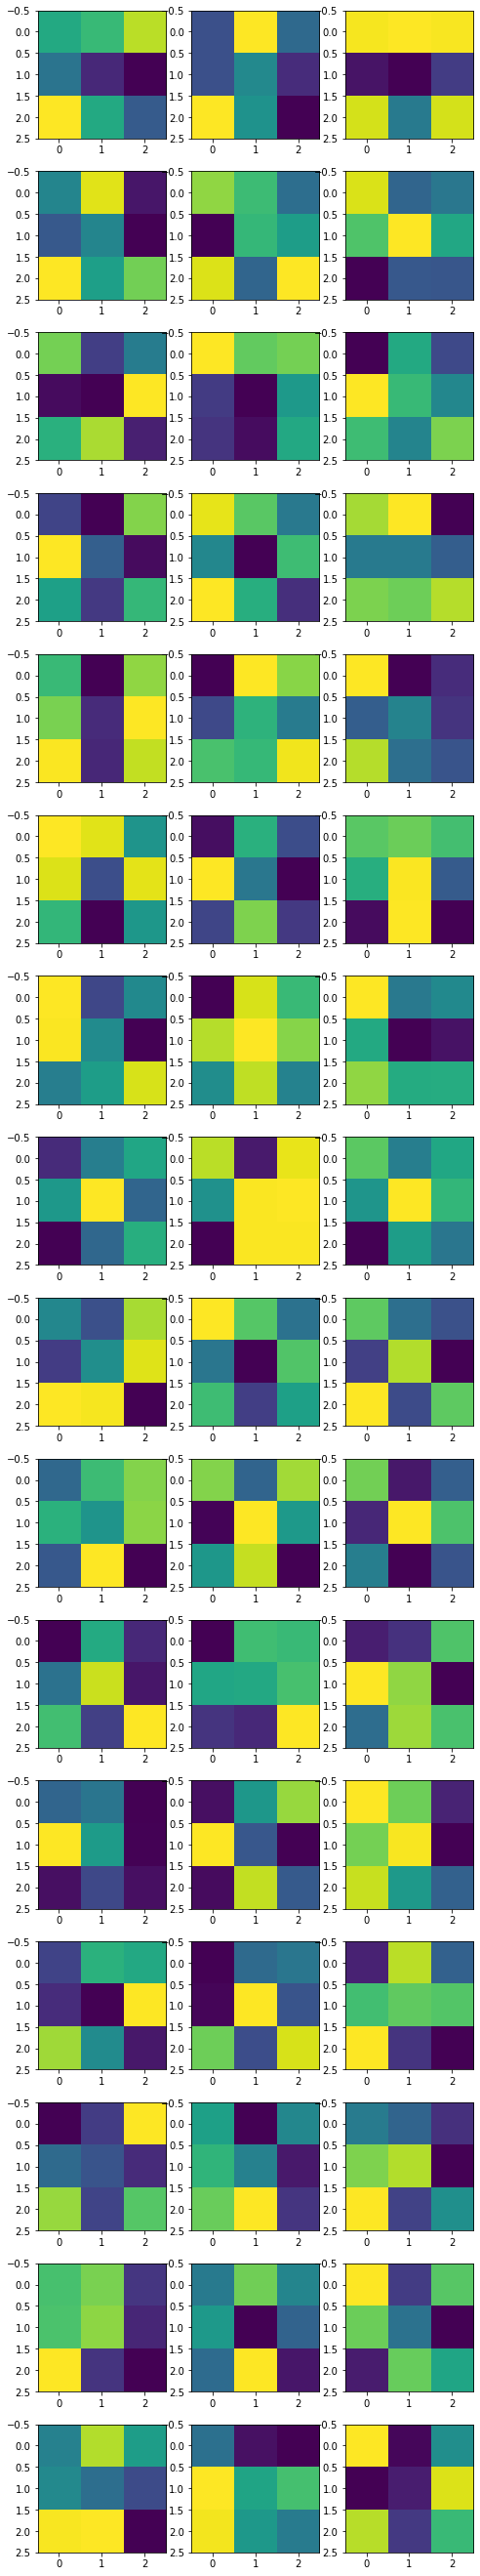

In [19]:
# 1. Filter View
conv_layer = model.layers[1]
filters, bias = conv_layer.get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

_1, _2, _3, n_filters = filters.shape
ix = 1

fig = plt.figure(figsize=(8,48))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:,:,j])
        ix += 1
        
plt.show()

input shape : (1, 100, 100, 3)
outputs shape : (1, 100, 100, 16)


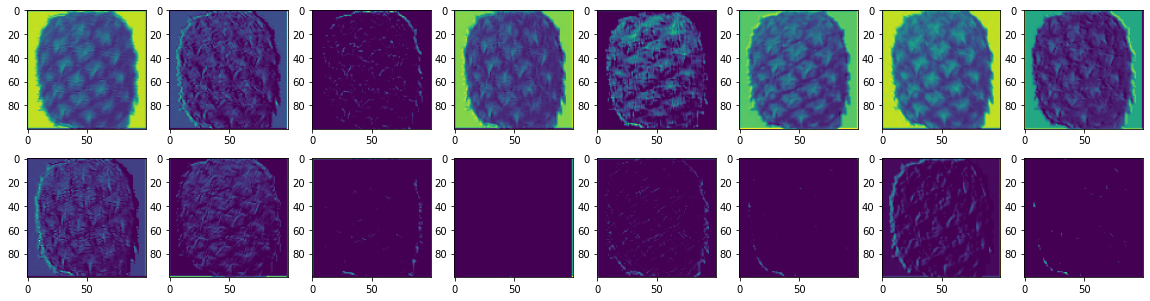

In [20]:
# 2. test image import
# test_fruit = "Apple"
test_fruit = "Pineapple"
# test_fruit = "Banana"

image = load_img(dir_path.format(
    "/{}/0_100.jpg".format(test_fruit)), target_size=(100, 100))

image = img_to_array(image)
image = expand_dims(image, axis=0)

print("input shape : {}".format(image.shape))

features = model.layers[1](image)
print("outputs shape : {}".format(features.numpy().shape))

_1, _2, _3, n_filters = features.shape

fig = plt.figure(figsize=(20,5))
for i in range(0,n_filters):
    plt.subplot(2,8,i + 1)
    plt.imshow(features[0,:,:,i])
    
plt.show()

input shape : (1, 100, 100, 16)
outputs shape : (1, 50, 50, 16)


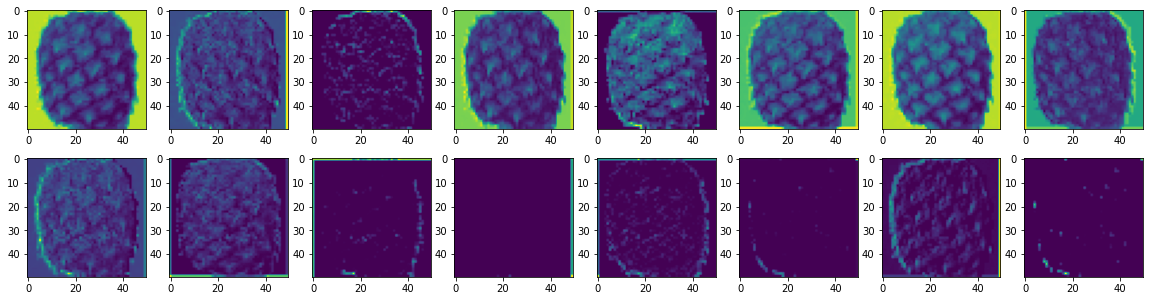

In [21]:
print("input shape : {}".format(features.numpy().shape))
features = model.layers[2](features)
print("outputs shape : {}".format(features.numpy().shape))

_1, _2, _3, n_filters = features.shape

fig = plt.figure(figsize=(20,5))
for i in range(0,n_filters):
    plt.subplot(2,8,i + 1)
    plt.imshow(features[0,:,:,i])
    
plt.show()

input shape : (1, 50, 50, 16)
outputs shape : (1, 50, 50, 32)


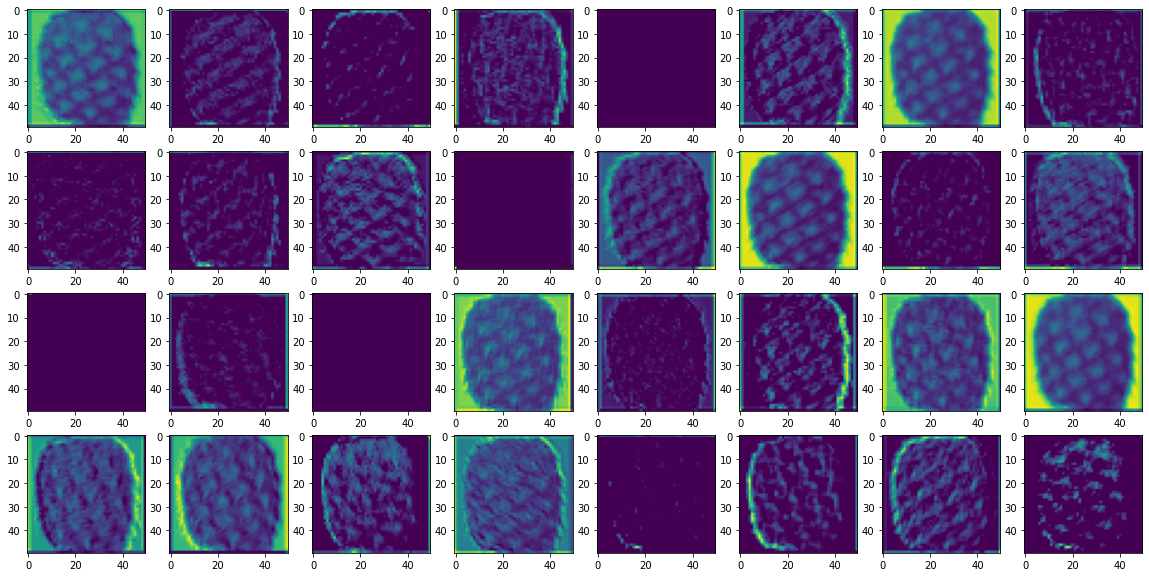

In [22]:
print("input shape : {}".format(features.numpy().shape))
features = model.layers[3](features)
print("outputs shape : {}".format(features.numpy().shape))

_1, _2, _3, n_filters = features.shape

fig = plt.figure(figsize=(20,10))
for i in range(0,n_filters):
    plt.subplot(4,8,i + 1)
    plt.imshow(features[0,:,:,i])
    
plt.show()

input shape : (1, 50, 50, 32)
outputs shape : (1, 25, 25, 32)


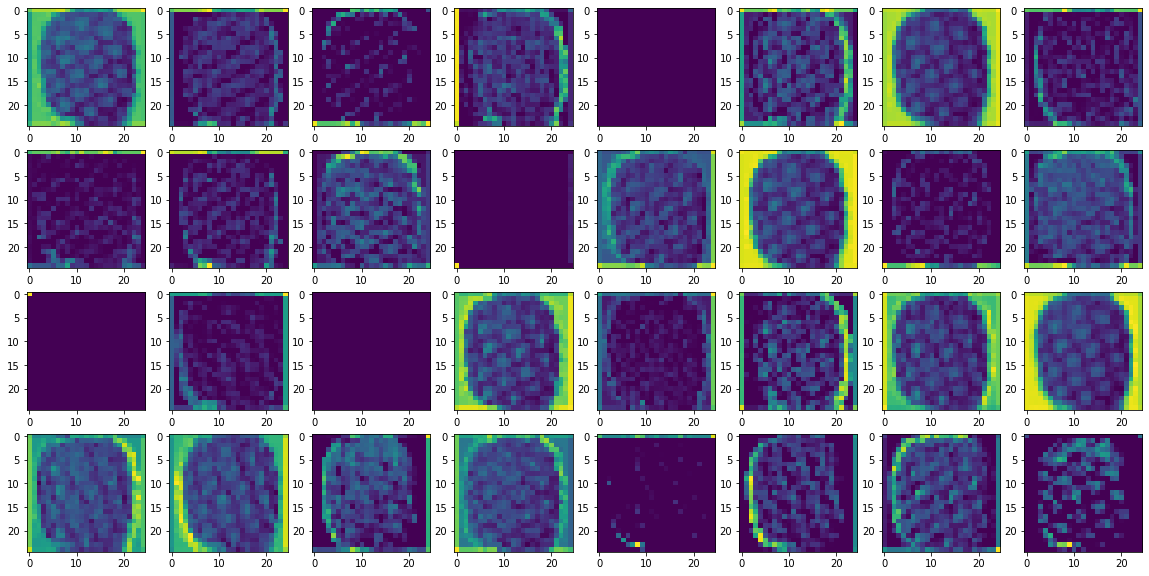

In [23]:
print("input shape : {}".format(features.numpy().shape))
features = model.layers[4](features)
print("outputs shape : {}".format(features.numpy().shape))

_1, _2, _3, n_filters = features.shape

fig = plt.figure(figsize=(20,10))
for i in range(0,n_filters):
    plt.subplot(4,8,i + 1)
    plt.imshow(features[0,:,:,i])
    
plt.show()

input shape : (1, 25, 25, 32)
outputs shape : (1, 25, 25, 64)


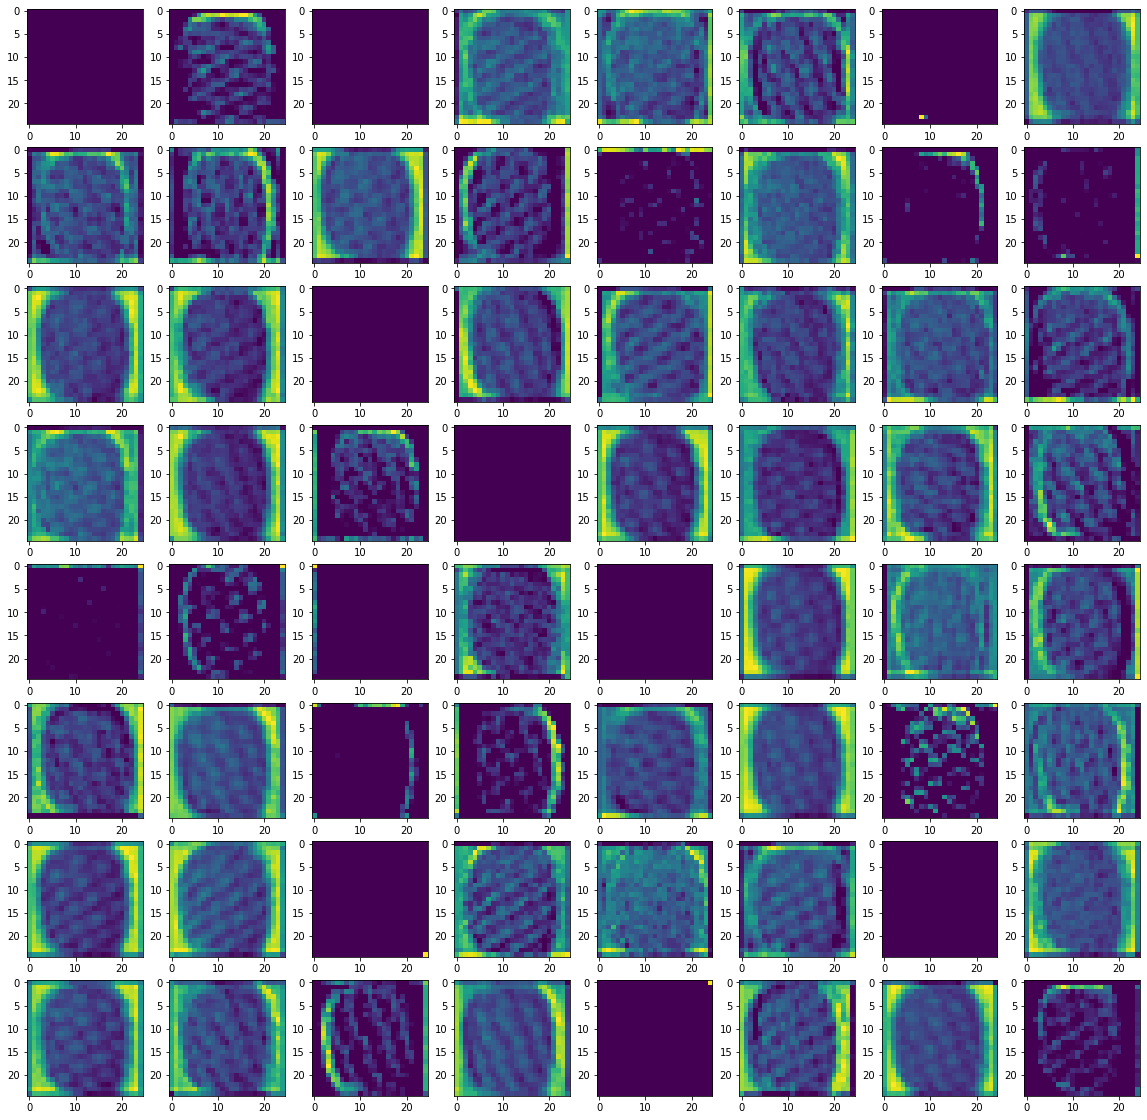

In [24]:
print("input shape : {}".format(features.numpy().shape))
features = model.layers[5](features)
print("outputs shape : {}".format(features.numpy().shape))

_1, _2, _3, n_filters = features.shape

fig = plt.figure(figsize=(20,20))
for i in range(0,n_filters):
    plt.subplot(8,8,i + 1)
    plt.imshow(features[0,:,:,i])
    
plt.show()

input shape : (1, 25, 25, 64)
outputs shape : (1, 12, 12, 64)


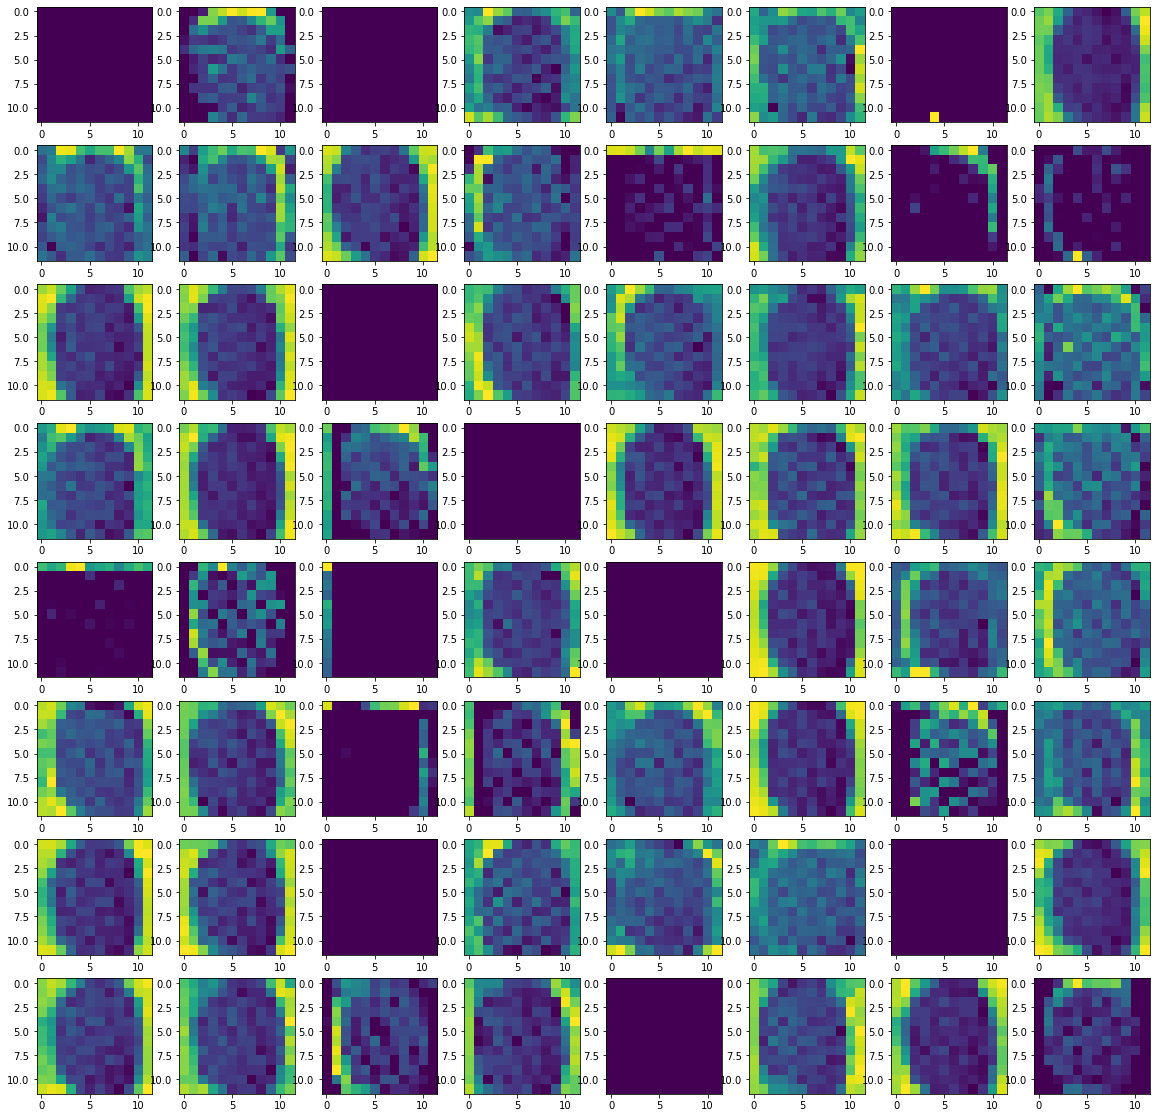

In [25]:
print("input shape : {}".format(features.numpy().shape))
features = model.layers[6](features)
print("outputs shape : {}".format(features.numpy().shape))

_1, _2, _3, n_filters = features.shape

fig = plt.figure(figsize=(20,20))
for i in range(0,n_filters):
    plt.subplot(8,8,i + 1)
    plt.imshow(features[0,:,:,i])
    
plt.show()